# Latency Comparison

In [1]:
%run 'common/plot_lat.py'

### Latency - HP - 128GB-75AS1011T9HW

In [2]:
plot_measurement_window_tabular('hp/lat/2')

---

### Latency - RockPro64 - 128GB-75AS1011T9HW

In [3]:
plot_measurement_window_tabular('rockpro64/lat/2')

---

### Latency - RockPro64 - 256GB-55MS101IT9JW

In [4]:
plot_measurement_window_tabular('rockpro64/lat/1')

---

In [5]:
from matplotlib.ticker import MultipleLocator

def plot_lat_comp(profiles_dirnames):
    ind = np.arange(len(RWMIXREADS))
    width = (1 - 0.4) / len(profiles_dirnames)

    for bs in BLOCK_SIZES:
        fig, ax = plt.subplots()
        fig.set_dpi(util.FIG_DPI)

        avg_values = {}
        std_values = {}

        for plat, dirname in profiles_dirnames.items():
            for rwmixread in RWMIXREADS:
                rounds, values = __get_avg_lat(dirname, bs, rwmixread)
                values_in_window = util.get_values_in_window(values)

                if plat not in avg_values:
                    avg_values[plat] = []

                avg = np.mean(values_in_window)
                avg_values[plat].append(avg)

                if plat not in std_values:
                    std_values[plat] = []
                std_values[plat].append(np.std(values_in_window, ddof=1))

        platforms = profiles_dirnames.keys()
        bars = []
        for idx, plat in enumerate(platforms):
            bars.append(
                ax.bar(ind + width * idx,
                       avg_values[plat],
                       width,
                       yerr=std_values[plat]))

        for idx_bs in ind:
            for idx_plt, plat in enumerate(platforms):
                ax.text(idx_bs + width * idx_plt,
                        avg_values[plat][idx_bs] + 3000,
                        '{:.1f}'.format(avg_values[plat][idx_bs]),
                        fontsize=6,
                        ha='center',
                        va='bottom')
        
        ax.yaxis.set_minor_locator(MultipleLocator(12500))
        ax.grid(which='major', alpha=0.5)
        ax.grid(which='minor', alpha=0.2)
        
        ax.set_ylabel('Time (ns)')
        ax.set_xlabel('R/W Mix %')

        ax.set_xticks(ind + width / 2)
        ax.set_xticklabels([__get_rwmix_read2write(rwmixread) for rwmixread in RWMIXREADS])

        ax.legend(bars,
                  platforms,
                  loc=8,
                  bbox_to_anchor=(0.5, 1),
                  frameon=False,
                  ncol=len(platforms),
                  prop={'size': 9})

        plt.title('Average Latency Comparison - ' + bs, y=1.1)
        plt.show()

#### Platform IOPS comparison with drive **128GB-75AS1011T9HW**

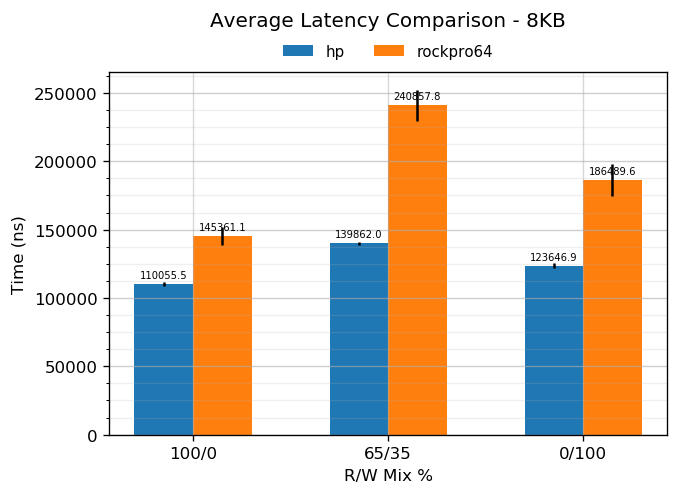

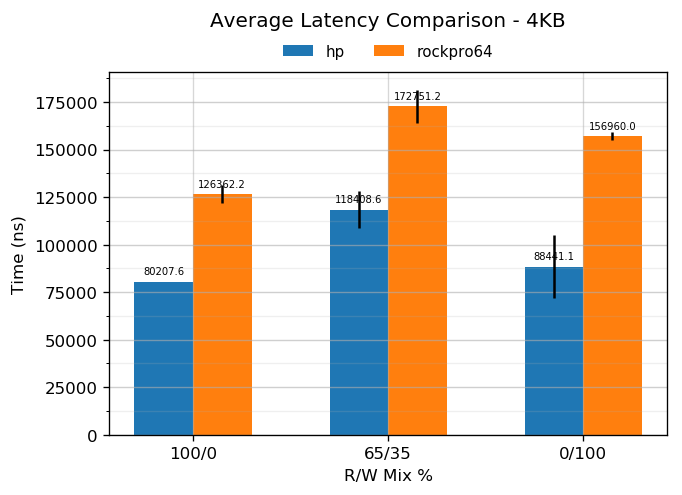

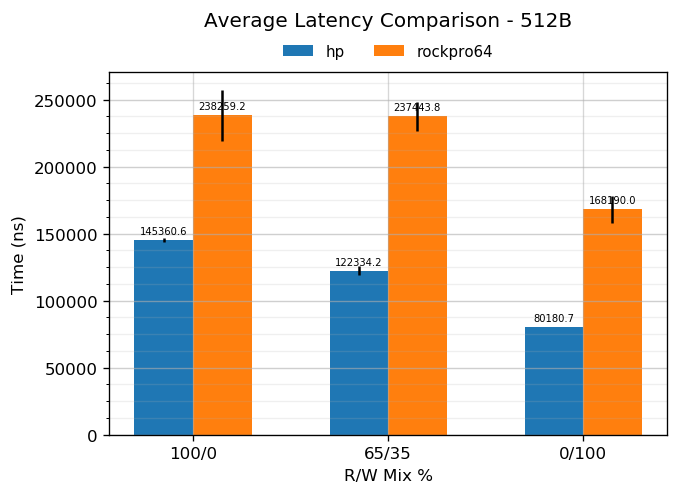

In [6]:
plot_lat_comp({
    'hp':        'hp/lat/2',
    'rockpro64': 'rockpro64/lat/2'
})

For all different block sizes and R/W Mixes, the RockPro64 platform performs significant higher latency than the HP platform.

---
### Verification Comparison for Results from **RockPro64**

#### 128GB-75AS1011T9HW vs. 256GB-55MS101IT9JW

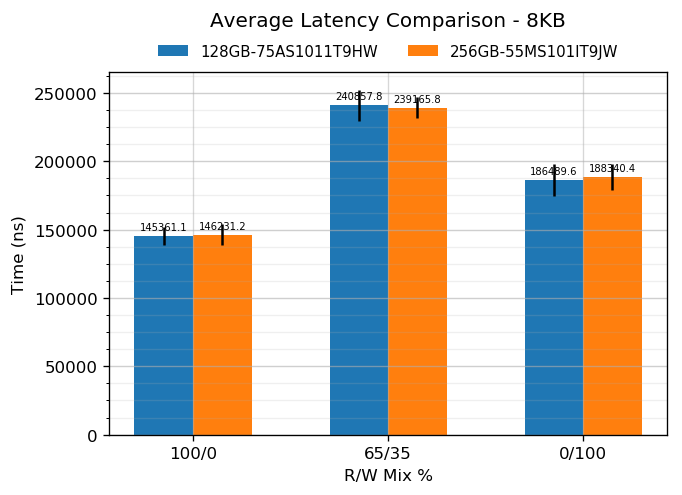

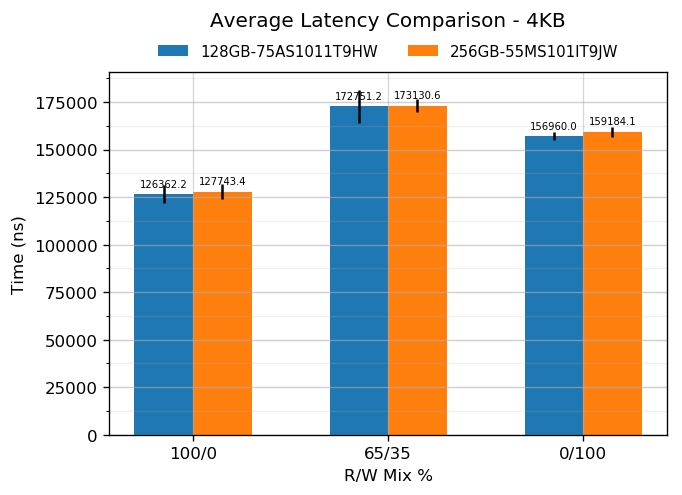

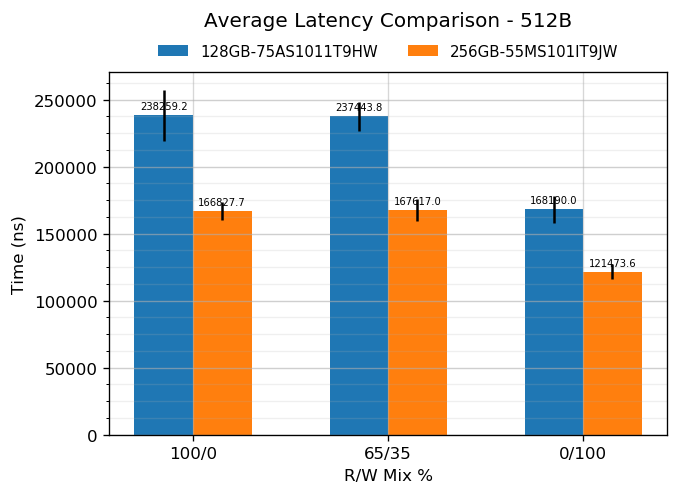

In [7]:
plot_lat_comp({
    '128GB-75AS1011T9HW': 'rockpro64/lat/2',
    '256GB-55MS101IT9JW': 'rockpro64/lat/1'
})

The **128GB-75AS1011T9HW** drive surprisingly has significant higher latency than the **256GB-55MS101IT9JW** drive at the block size of 512B , which is still needed to figure out the reason.